<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/Make_moons_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
data,target=make_moons(n_samples=1000)

In [3]:
data[:5]

array([[ 0.65174269, -0.43739898],
       [ 0.94651143, -0.49856846],
       [ 0.04720781,  0.19637681],
       [ 1.66944246, -0.24286391],
       [-0.91490602,  0.4036669 ]])

In [4]:
data.shape

(1000, 2)

In [5]:
target[:5]

array([1, 1, 1, 1, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

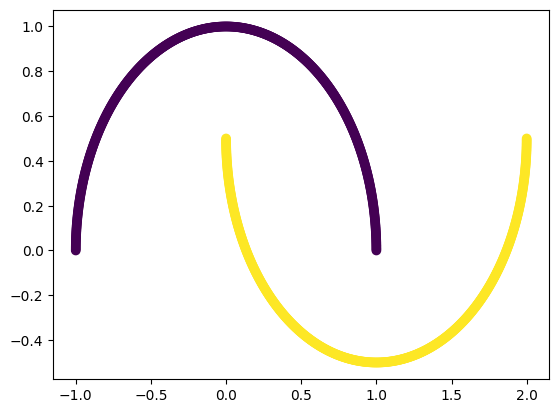

In [6]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show

In [7]:
model=Sequential([
    Input(shape=[2]),
    Dense(4,activation="relu"),
    Dense(4,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.30)

In [10]:
x_train.shape

(700, 2)

In [11]:
x_test.shape

(300, 2)

In [16]:
optimizer=tf.keras.optimizers.Adam()
losses=tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer,loss=losses,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
22/22 [==============================] - 2s 12ms/step - loss: 0.2730 - accuracy: 0.8686 - val_loss: 0.2970 - val_accuracy: 0.8600
Epoch 2/25
22/22 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8700 - val_loss: 0.2936 - val_accuracy: 0.8600
Epoch 3/25
22/22 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.8714 - val_loss: 0.2902 - val_accuracy: 0.8633
Epoch 4/25
22/22 [==============================] - 0s 6ms/step - loss: 0.2626 - accuracy: 0.8743 - val_loss: 0.2870 - val_accuracy: 0.8633
Epoch 5/25
22/22 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.8743 - val_loss: 0.2835 - val_accuracy: 0.8667
Epoch 6/25
22/22 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.8757 - val_loss: 0.2801 - val_accuracy: 0.8700
Epoch 7/25
22/22 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.8771 - val_loss: 0.2771 - val_accuracy: 0.8700
Epoch 8/25
22/22 [=

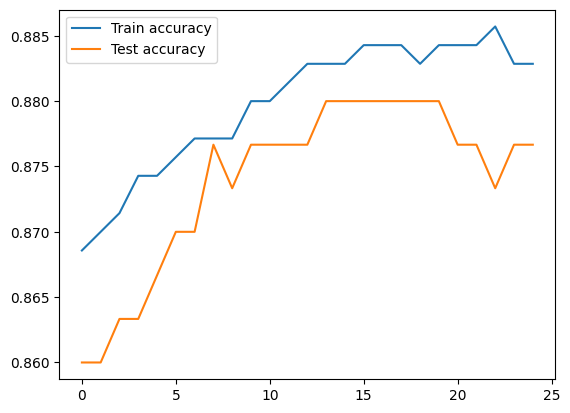

In [18]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="Test accuracy")
plt.legend()
plt.show()

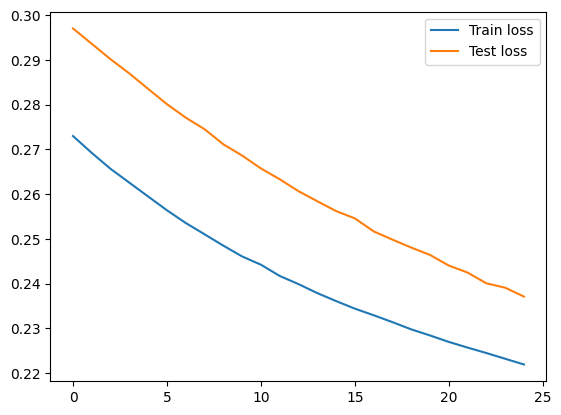

In [19]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.legend()
plt.show()

In [20]:
y_pred=model.predict(x_test)
y_pred=np.round(y_pred)

10/10 [==============================] - 0s 2ms/step


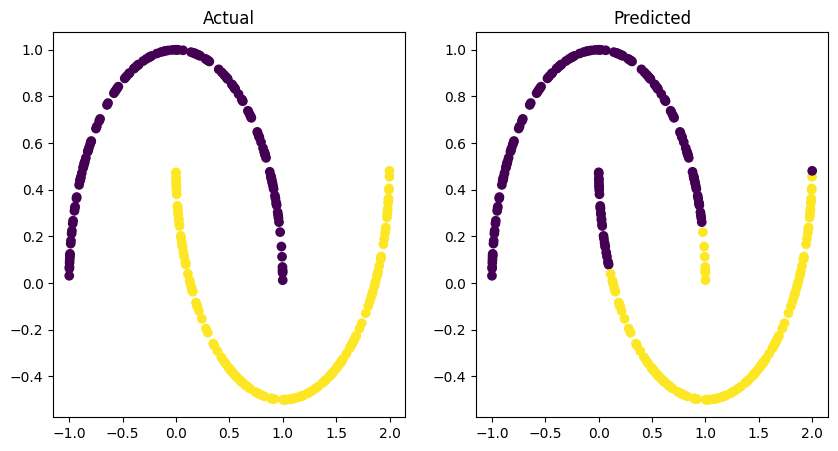

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Actual")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.subplot(1,2,2)
plt.title("Predicted")
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.show()